In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import cv2


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 119s 1us/step


In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
jpg_img = list(data_dir.glob('*/*.jpg'))
len(jpg_img)


3670

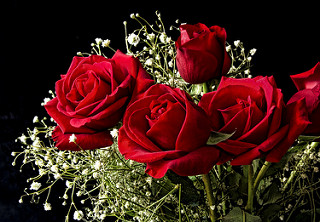

In [7]:
PIL.Image.open(str(jpg_img[2000]))

add labeling to each flower and creating a dictionaries

In [8]:
flower_image_dict = {
    'roses': list(data_dir.glob("roses/*")),
    'daisy': list(data_dir.glob("daisy/*")),
    'dandelion': list(data_dir.glob("dandelion/*")),
    'sunflowers': list(data_dir.glob("sunflowers/*")),
    'tulips': list(data_dir.glob("tulips/*")),
}

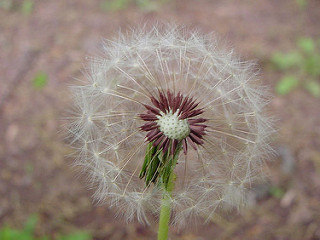

In [9]:
PIL.Image.open(str(flower_image_dict["dandelion"][21]))

In [10]:
flower_label_dict = {
    'roses':0, 
    'daisy':1, 
    'dandelion':2, 
    'sunflowers':3,
    'tulips':4,
}

Image to Numpy Array

In [11]:
img = cv2.imread(str(flower_image_dict["sunflowers"][0]))
img.shape

(330, 500, 3)

Resize the image

In [12]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [13]:
X,y = [],[]

for flower_name,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [14]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [15]:
x = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scale the RGB values into 0 to 1

In [17]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_test_scaled

array([[[[0.15294118, 0.10980392, 0.09411765],
         [0.14901961, 0.09411765, 0.09019608],
         [0.07843137, 0.08627451, 0.11372549],
         ...,
         [0.16862745, 0.18039216, 0.19607843],
         [0.16470588, 0.17647059, 0.19215686],
         [0.16862745, 0.18431373, 0.19607843]],

        [[0.15294118, 0.12941176, 0.1254902 ],
         [0.17254902, 0.12941176, 0.12941176],
         [0.12941176, 0.12156863, 0.1254902 ],
         ...,
         [0.20392157, 0.22352941, 0.23921569],
         [0.19607843, 0.21568627, 0.23137255],
         [0.19215686, 0.21568627, 0.23137255]],

        [[0.14901961, 0.1372549 , 0.11764706],
         [0.17254902, 0.13333333, 0.1254902 ],
         [0.1254902 , 0.10196078, 0.08627451],
         ...,
         [0.20392157, 0.23529412, 0.25098039],
         [0.18823529, 0.22352941, 0.23921569],
         [0.19215686, 0.22352941, 0.23921569]],

        ...,

        [[0.24313725, 0.2745098 , 0.54901961],
         [0.24313725, 0.2745098 , 0.53333333]

In [18]:
num_classes = len(flower_label_dict)
models = Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

In [21]:
models.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
models.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
models.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.3546 - loss: 1.5742
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.6136 - loss: 0.9833
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.6841 - loss: 0.8056
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.7693 - loss: 0.6194
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.8604 - loss: 0.4177


In [23]:
models.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6124 - loss: 1.0560


[1.041225552558899, 0.6376021504402161]

Here in the training sample accuracy and test sample accuracy has big difference so it is overfitting the data.
That's why we use data augmentation techniques

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

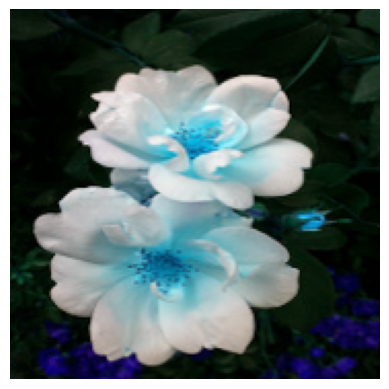

In [25]:
plt.axis('off')
plt.imshow(X[0])

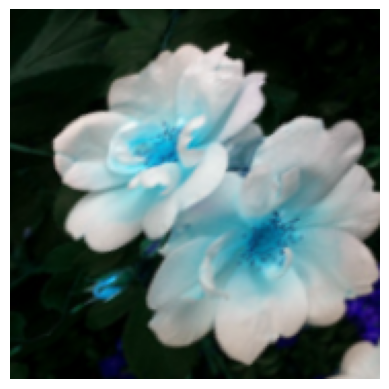

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [27]:
num_classes = len(flower_label_dict)
models = Sequential([
    data_augmentation,
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

In [28]:
models.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

models.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.4218 - loss: 1.3512
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.5869 - loss: 1.0489
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.6463 - loss: 0.8965
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.6823 - loss: 0.8386
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.7019 - loss: 0.7664


In [29]:
models.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6432 - loss: 0.8638


[0.8539336323738098, 0.6634877324104309]

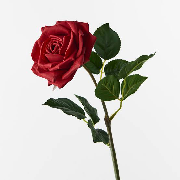

In [30]:
images = 'rose.jpg'
images = tf.keras.utils.load_img(images, target_size=(180, 180,3))
img_arr = tf.keras.utils.img_to_array(images)
img_bat = tf.expand_dims(img_arr, axis=0)
images


In [31]:
predictions = models.predict(img_bat)
score = tf.nn.softmax(predictions)
score

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[0., 1., 0., 0., 0.]], dtype=float32)>

In [32]:
print('Flower in image is {} with accuracy of {:0.2f}'.format(np.argmax(score), np.max(score)*100))

Flower in image is 1 with accuracy of 100.00
